In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../flaming-choripan') # or just install the module
sys.path.append('../../astro-lightcurves-handler') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from synthsne import C_

root_folder = '../../surveys-save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (../../surveys-save)
(0) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds - 8.842[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (../../surveys-save)
(0) - ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds - 8.842[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir

filedir = '../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds'
filedict = get_dict_from_filedir(filedir)
root_folder = filedict['*rootdir*']
cfilename = filedict['*cfilename*']
survey = filedict['survey']
lcdataset = load_pickle(filedir)
print(lcdataset)

> loading: ../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds
LCDataset:
[outliers - samples 10]
(*) obs_samples: 541 - min_len: 14 - max_dur: 408.0[days] - dur(p50): 133.8[days] - cadence(p50): 1.0[days]
(g) obs_samples: 260 - min_len: 6 - max_dur: 408.0[days] - dur(p50): 133.8[days] - cadence(p50): 3.0[days]
(r) obs_samples: 281 - min_len: 8 - max_dur: 376.0[days] - dur(p50): 128.7[days] - cadence(p50): 3.0[days]
   |█▌      | SLSN - 2/10 (20.00%)
   |▊       | SNIa - 1/10 (10.00%)
   |█▌      | SNIbc - 2/10 (20.00%)
   |████    | allSNII - 5/10 (50.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint - samples 48]
(*) obs_samples: 1,107 - min_len: 7 - max_dur: 298.1[days] - dur(p50): 40.5[days] - cadence(p50): 1.0[days]
(g) obs_samples: 450 - min_len: 0 - max_dur: 221.7[days] - dur(p50): 28.0[days] - cadence(p50): 2.9[days]
(r) obs_samples: 657 - min_len: 4 - max_dur: 298.1[days] - dur(p50): 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


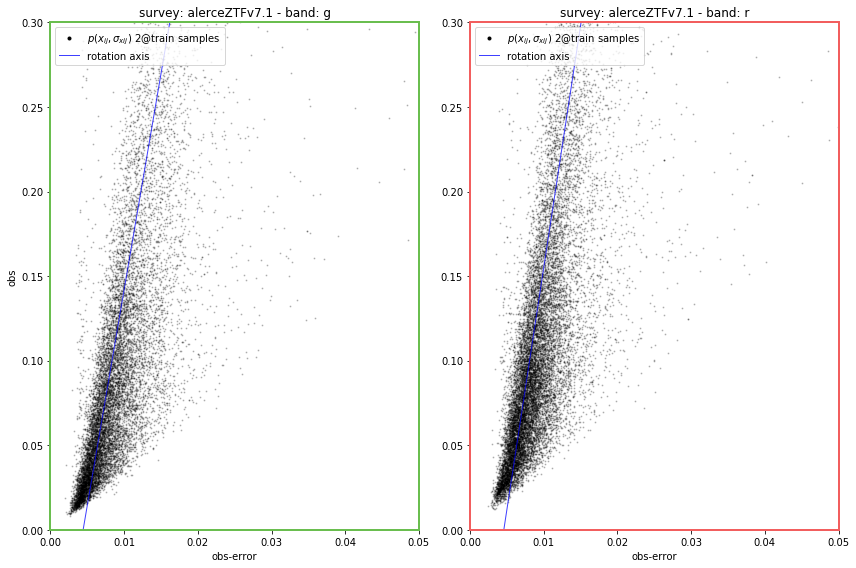

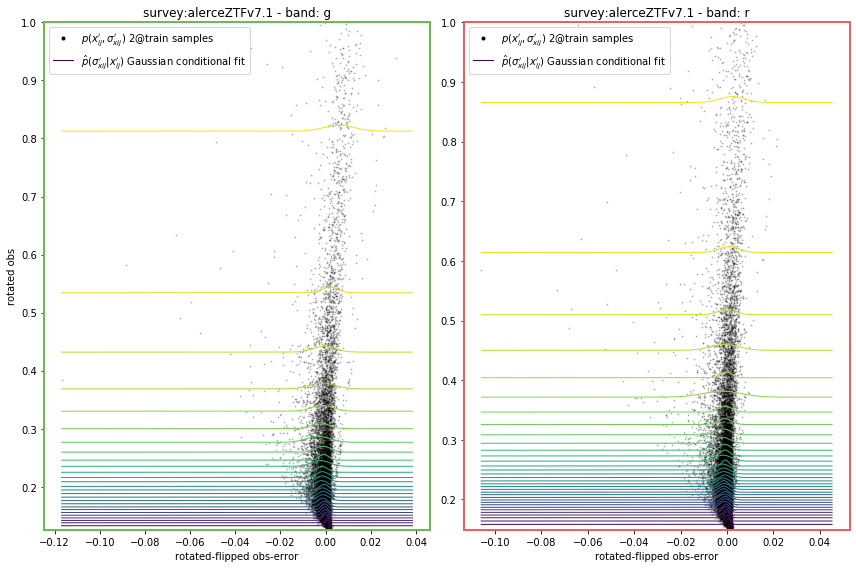

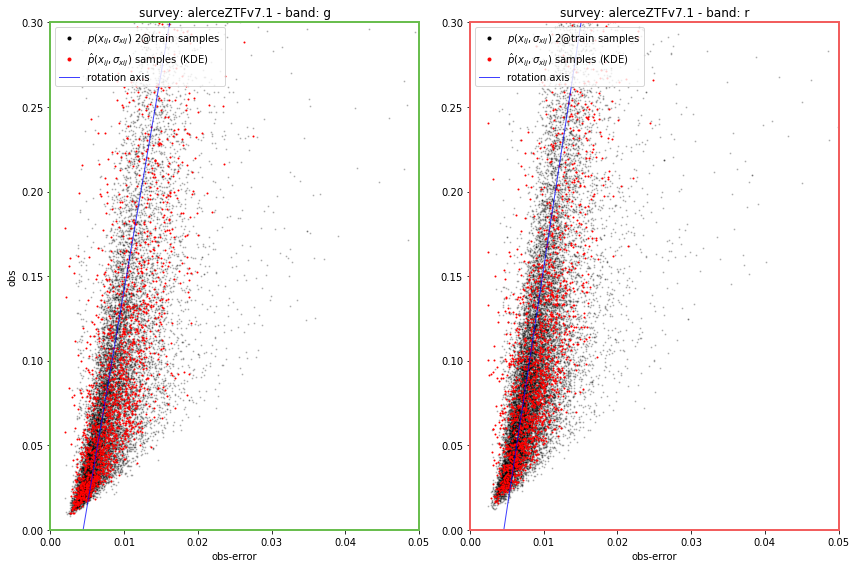

In [4]:
%load_ext autoreload
%autoreload 2
from synthsne.distr_fittings import ObsErrorConditionalSampler
from synthsne.plots.samplers import plot_obse_samplers

kf = 2
set_name = f'{kf}@train'
band_names = lcdataset[set_name].band_names
obse_sampler_bdict = {b:ObsErrorConditionalSampler(lcdataset, set_name, b) for b in band_names}
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=0)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1, add_samples=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


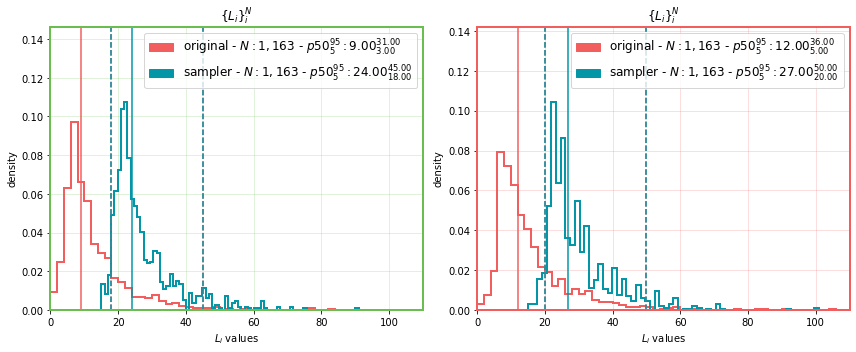

In [5]:
%load_ext autoreload
%autoreload 2
from synthsne.distr_fittings import CurveLengthSampler
from synthsne.plots.samplers import plot_length_samplers

band_names = lcdataset[set_name].band_names
offset = 15
length_sampler_bdict = {b:CurveLengthSampler(lcdataset, set_name, b, offset) for b in band_names}
plot_length_samplers(length_sampler_bdict, lcdataset, set_name)

In [6]:
from flamingchoripan.files import load_pickle, save_pickle
from synthsne import C_

to_save = {
    'obse_sampler_bdict':obse_sampler_bdict,
    #'length_sampler_bdict':length_sampler_bdict,
    'length_sampler_bdict':None,
}
save_filedir = f'../save/{survey}/{cfilename}/{set_name}/samplers.{C_.EXT_SAMPLER}'
save_pickle(save_filedir, to_save)

> saving: ../save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe/2@train/samplers.smplr
